## Neurozoo



### Funkcja sigmoidalna



Funkcja sigmoidalna zamienia dowolną wartość („sygnał”) w wartość z przedziału $(0,1)$, czyli wartość, która może być interperetowana jako prawdopodobieństwo.

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$



In [1]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

sigmoid(torch.tensor(0.6))

tensor(0.6457)

'sigmoid.png'

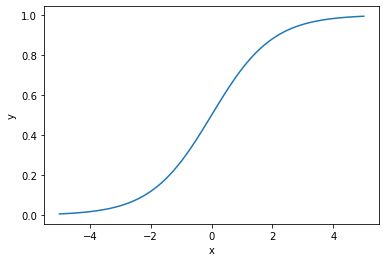

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-5,5,100)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, sigmoid(x))
fname = 'sigmoid.png'
plt.savefig(fname)
fname

[[file:# Out[32]:

    'sigmoid.png'

![img](./obipy-resources/Tb0Of9.png)]]



#### PyTorch



Funkcja `torch.sigmoid` po prostu stosuje sigmoidę do każdego elementu tensora (*element-wise*).



In [3]:
import torch

torch.sigmoid(torch.tensor([0.6, 1.0, -5.0]))

tensor([0.6457, 0.7311, 0.0067])

Istnieje również `torch.nn.Sigmoid`, które może być używane jako warstwa.



In [4]:
import torch.nn as nn

s = nn.Sigmoid()
s(torch.tensor([0.0, -0.2, 0.4]))

tensor([0.5000, 0.4502, 0.5987])

##### Implementacja w Pytorchu



In [5]:
import torch.nn as nn
import torch

class MySigmoid(nn.Module):
    def __init__(self):
        super(MySigmoid, self).__init__()

    def forward(self, x):
        return 1 / (1 + torch.exp(-x))

s = MySigmoid()
s(torch.tensor([0.0, 0.5, 0.3]))

tensor([0.5000, 0.6225, 0.5744])

#### Wagi



Funkcja sigmoidalna nie ma żadnych wyuczalnych wag.



##### **Pytanie**: Czy można rozszerzyć funkcję sigmoidalną o jakieś wyuczalne wagi?



### Regresja liniowa



### Softmax



W klasyfikacji wieloklasowej należy zwrócić musimy zwrócić rozkład
prawdopodobieństwa po wszystkich klasach, w przeciwieństwie do
klasyfikacji binarnej, gdzie wystarczy zwrócić jedną liczbę —
prawdopodobieństwo pozytywnej klasy ($p$; prawdopodobieństwo drugiej
klasy to po prostu $1-p$).

A zatem na potrzeby klasyfikacji wieloklasowej potrzeba wektorowego
odpowiednika funkcji sigmoidalnej, to jest funkcji, która zamienia
nieznormalizowany wektor $\vec{z} = [z_1,\dots,z_k]$ (pochodzący np. z
poprzedzającej warstwy liniowej) na rozkład prawdopobieństwa.
Potrzebujemy zatem funkcji $s: \mathcal{R}^k \rightarrow [0,1]^k$

spełniającej następujące warunki:

-   $s(z_i) = s_i(z) \in [0,1]$
-   $\Sigma_i s(z_i) = 1$
-   $z_i > z_j \Rightarrow s(z_i) > s(z_j)$

Można by podać takie (**błędne**!) rozwiązanie:

$$s(z_i) = \frac{z_i}{\Sigma_{j=1}^k z_j}$$

To rozwiązanie zadziała błędnie dla liczb ujemnych, trzeba najpierw
użyć funkcji monotonicznej, która przekształaca $\mathcal{R}$ na $\mathcal{R^+}$.
Naturalna funkcja tego rodzaju to funkcja wykładnicza $\exp{x} = e^x$.
Tym sposobem dochodzimy do funkcji softmax:

$$s(z_i) = \frac{e^{z_i}}{\Sigma_{j=1}^k e^{z_j}}$$

Mianownik ułamka w definicji funkcji softmax nazywamy czasami czynnikiem normalizacyjnym:
$Z(\vec{z}) = \Sigma_{j=1}^k e^{z_j}$, wtedy:

$$s(z_i) = \frac{e^{z_i}}{Z(\vec{z})}$$

Definicja w PyTorchu:



In [6]:
import torch

def softmax(z):
    z_plus = torch.exp(z)
    return z_plus / torch.sum(z_plus)

softmax(torch.tensor([3., -1., 0., 5.]))

tensor([0.1182, 0.0022, 0.0059, 0.8737])

![img](./softmax.png "Softmax")



#### Soft vs hard



Dlaczego *softmax*? Czasami używa się funkcji **hardmax**, która np.
wektora $[3, -1, 0, 5]$ zwróciłaby $[0, 0, 0, 5]$ — to jest po prostu
wektorowa wersja funkcji zwracającej maksimum. Istnieje też funkcja
hard\*arg\*max, która zwraca wektor *one-hot* — z jedną jedynką na
pozycji dla największej wartości (zamiast podania największej
wartości), np. wartość hardargmax dla $[3, -1, 0, 5]$ zwróciłaby $[0,
0, 0, 1]$.

Zauważmy, że powszechnie przyjęta nazwa *softmax* jest właściwie
błędna, funkcja ta powinna nazywać się *softargmax*, jako że w
„miękki” sposób identyfikuje największą wartość przez wartość zbliżoną
do 1 (na pozostałych pozycjach wektora nie będzie 0).



##### **Pytanie**: Jak można zdefiniować funkcję *softmax* w ścisłym tego słowa znaczeniu („miękki” odpowiednik hardmax, nie hardargmax)?



#### PyTorch



Funkcja `torch.nn.functional.softmax` normalizuje wartości dla całego tensora:



In [7]:
import torch.nn as nn

nn.functional.softmax(torch.tensor([0.6, 1.0, -5.0]))

<ipython-input-7-e808e5e4899b>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  nn.functional.softmax(torch.tensor([0.6, 1.0, -5.0]))


tensor([0.4007, 0.5978, 0.0015])

… zobaczmy, jak ta funkcja zachowuje się dla macierzy:



In [8]:
import torch.nn as nn

nn.functional.softmax(torch.tensor([[0.6, 1.0], [-2.0, 3.5]]))

<ipython-input-8-95deaae56e16>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  nn.functional.softmax(torch.tensor([[0.6, 1.0], [-2.0, 3.5]]))


tensor([[0.4013, 0.5987],
        [0.0041, 0.9959]])

Za pomocą (zalecanego zresztą) argumentu `dim` możemy określić wymiar, wzdłuż którego dokonujemy normalizacji:



In [9]:
import torch.nn as nn

nn.functional.softmax(torch.tensor([[0.6, 1.0], [-2.0, 3.5]]), dim=0)

tensor([[0.9309, 0.0759],
        [0.0691, 0.9241]])

Istnieje również `torch.nn.Softmax`, które może być używane jako warstwa.



In [10]:
import torch.nn as nn

s = nn.Softmax(dim=0)
s(torch.tensor([0.0, -0.2, 0.4]))

tensor([0.3021, 0.2473, 0.4506])

##### Implementacja w Pytorchu



In [11]:
import torch.nn as nn
import torch

class MySoftmax(nn.Module):
    def __init__(self):
        super(MySoftmax, self).__init__()

    def forward(self, x):
        ex = torch.exp(x)
        return ex / torch.sum(ex)

s = MySigmoid()
s(torch.tensor([0.0, 0.5, 0.3]))

tensor([0.5000, 0.6225, 0.5744])

###### **Pytanie**: Tak naprawdę wyżej zdefiniowana klasa `MySoftmax` nie zachowuje się identycznie jak `nn.Softmax`. Na czym polega różnica?



#### Przypadek szczególny



Sigmoida jest przypadkiem szczególnym funkcji softmax:

$$\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} = \frac{e^x}{e^x + e^0} = s([x, 0])_1$$

Ogólniej: softmax na dwuelementowych wektorach daje przesuniętą sigmoidę (przy ustaleniu jednej z wartości).



'softmax3.png'

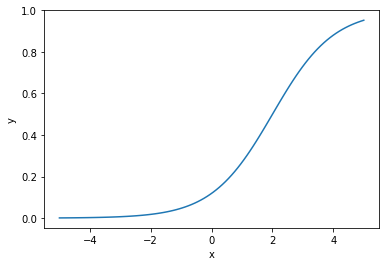

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

x = torch.linspace(-5,5,100)
plt.xlabel("x")
plt.ylabel("y")
a = torch.Tensor(x.size()[0]).fill_(2.)
m = torch.stack([x, a])
plt.plot(x, nn.functional.softmax(m, dim=0)[0])
fname = 'softmax3.png'
plt.savefig(fname)
fname

[[file:# Out[19]:

    'softmax3.png'

![img](./obipy-resources/gjBA7K.png)]]



'softmax3d.png'

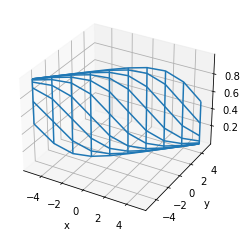

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
import torch.nn as nn

x = torch.linspace(-5,5,10)
y = torch.linspace(-5,5,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlabel("x")
plt.ylabel("y")
X, Y = torch.meshgrid(x, y)
m = torch.stack([X, Y])
z = nn.functional.softmax(m, dim=0)
ax.plot_wireframe(x, y, z[0])
fname = 'softmax3d.png'
plt.savefig(fname)
fname

[[file:# Out[27]:

    'softmax3d.png'

![img](./obipy-resources/p96515.png)]]



#### Wagi



Podobnie jak funkcja sigmoidalna, softmax nie ma żadnych wyuczalnych wag.



#### Zastosowania



Podstawowym zastosowaniem funkcji softmax jest klasyfikacja
wieloklasowa, również w wypadku zadań przetwarzania sekwencji, które
mogą być interpretowane jako klasyfikacja wieloklasowa:

-   przewidywanie kolejnego słowa w modelowaniu języka (klasą jest słowo, zbiór klas to słownik, np. klasą początku tekstu *Dzisiaj rano kupiłem w piekarni* może być *bułki*)
-   przypisywanie etykiet (np. części mowy) słowom.



### LogSoftmax



Ze względów obliczeniowych często korzysta się z funkcji **LogSoftmax**
która zwraca logarytmy pradopodobieństw (*logproby*).

$$log s(z_i) = log \frac{e^{z_i}}{\Sigma_{j=1}^k e^{z_j}}$$



#### PyTorch



In [14]:
import torch.nn as nn

s = nn.LogSoftmax(dim=0)
s(torch.tensor([0.0, -0.2, 0.4]))

tensor([-1.1971, -1.3971, -0.7971])

Niektóre funkcje kosztu (np. `NLLLoss`) zaimplementowane w PyTorchu
operują właśnie na logarytmach prawdopobieństw.



### Przykład: klasyfikacja wieloklasowa



Na przykładzie rozpoznawania dyscypliny sportu: git://gonito.net/sport-text-classification.git

Wczytujemy zbiór uczący:



In [15]:
import gzip
from pytorch_regression.analyzer import vectorize_text, vector_length

texts = []
labels = []
labels_dic = {}
labels_revdic = {}
c = 0

with gzip.open('sport-text-classification/train/train.tsv.gz', 'rt') as fh:
  for line in fh:
    line = line.rstrip('\n')
    line = line.replace('\\\t', ' ')
    label, text = line.split('\t')
    texts.append(text)
    if label not in labels_dic:
       labels_dic[label] =c
       labels_revdic[c] = label
       c += 1
    labels.append(labels_dic[label])
nb_of_labels = len(labels_dic)
labels_dic

{'zimowe': 0,
 'moto': 1,
 'tenis': 2,
 'pilka-reczna': 3,
 'sporty-walki': 4,
 'koszykowka': 5,
 'siatkowka': 6,
 'pilka-nozna': 7}

Przygotowujemy model:



In [16]:
import torch.nn as nn
from torch import optim

model = nn.Sequential(
        nn.Linear(vector_length, nb_of_labels),
        nn.LogSoftmax()
      )

optimizer = optim.Adam(model.parameters())

Funkcja kosztu to log-loss.



In [17]:
import torch
import torch.nn.functional as F

loss_fn = torch.nn.NLLLoss()

expected_class_id = torch.tensor([2])
loss_fn(torch.log(
           torch.tensor([[0.3, 0.5, 0.1, 0.0, 0.1]])),
        expected_class_id)

tensor(2.3026)

Pętla ucząca:



In [18]:
iteration = 0
step = 50
closs = torch.tensor(0.0, dtype=torch.float, requires_grad=False)

for t, y_exp in zip(texts, labels):
  x = vectorize_text(t).float().unsqueeze(dim=0)

  optimizer.zero_grad()

  y_logprobs = model(x)

  loss = loss_fn(y_logprobs, torch.tensor([y_exp]))

  loss.backward()

  with torch.no_grad():
      closs += loss

  optimizer.step()

  if iteration % 50 == 0:
     print((closs / step).item(), loss.item(), iteration, y_exp, torch.exp(y_logprobs), t)
     closs = torch.tensor(0.0, dtype=torch.float, requires_grad=False)
  iteration += 1

  if iteration == 5000:
     break

/usr/lib/python3.9/site-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.0415690578520298 2.0784528255462646 0 0 tensor([[0.1251, 0.1250, 0.1249, 0.1248, 0.1250, 0.1251, 0.1252, 0.1249]],
       grad_fn=<ExpBackward>) MŚ w hokeju: mocny początek Finów w Danii. Francja podniosła się po laniu od Rosjan Reprezentacja Finlandii po niepowodzeniach na ostatnich igrzyskach olimpijskich rozpoczęła dobrze tegoroczny turniej mistrzostw świata elity od pewnej wygranej z Koreą Południową. Francuzi zdobyli pierwsze punkty po pokonaniu Białorusi.
2.078942060470581 2.065171003341675 50 4 tensor([[0.1260, 0.1263, 0.1243, 0.1247, 0.1268, 0.1240, 0.1240, 0.1238]],
       grad_fn=<ExpBackward>) Fotorelacja: Ważenie przed galą KSW 27 - Cage Time Prezentujemy fotorelację z oficjalnej ceremonii ważenia przed sobotnią galą  KSW 27 - Cage Time.
2.06972599029541 2.1077024936676025 100 5 tensor([[0.1271, 0.1261, 0.1257, 0.1251, 0.1266, 0.1215, 0.1224, 0.1254]],
       grad_fn=<ExpBackward>) Wisła podpisała swój najważniejszy kontrakt Gdyby nie firma Can-Pack S.A. nie byłoby w osta

1.9244329929351807 1.9046193361282349 1050 4 tensor([[0.1264, 0.1245, 0.1287, 0.1161, 0.1489, 0.1108, 0.1173, 0.1274]],
       grad_fn=<ExpBackward>) Była rywalka Joanny Jędrzejczyk na dopingu. Czeka ją zawieszenie Była pretendenta to tytułu mistrzyni UFC w wadze słomkowej, Jessica Penne (MMA 12-5) została zawieszona przez Amerykańską Agencję Antydopingową za stosowanie niedozwolonego środka. Amerykankę czeka 1,5-roczne zawieszenie.
1.9093575477600098 1.8683863878250122 1100 2 tensor([[0.1120, 0.1147, 0.1544, 0.1150, 0.1141, 0.1240, 0.1093, 0.1566]],
       grad_fn=<ExpBackward>) Finał WTA Sydney: Radwańska - Konta na żywo. Transmisja TV, stream online W piątek Agnieszka Radwańska zmierzy się z Johanną Kontą w ramach finału WTA Sydney. Transmisja TV na antenie TVP 1 i TVP Sport. Stream online w sport.tvp.pl.
1.9156808853149414 1.9488784074783325 1150 7 tensor([[0.1212, 0.1255, 0.1152, 0.1314, 0.1246, 0.1175, 0.1223, 0.1424]],
       grad_fn=<ExpBackward>) Piękne zachowanie piłkarza Bor

1.732917308807373 1.869311809539795 2100 5 tensor([[0.1091, 0.1430, 0.1048, 0.1265, 0.1092, 0.1542, 0.1102, 0.1428]],
       grad_fn=<ExpBackward>) Martynas Sajus: Sobin jest bardziej doświadczonym graczem, ale w przyszłości będę od niego lepszy Pojedynek Josipa Sobina z Martynasem Sajusem może być jednym ze smaczków piątkowego spotkania Anwilu z Polpharmą. Który ze środkowych da więcej swojej ekipie? - On jest bardziej doświadczony, ale w przyszłości to ja będę lepszy - śmieje się Sajus.
1.7519197463989258 1.5113999843597412 2150 2 tensor([[0.0979, 0.1257, 0.2206, 0.1103, 0.1044, 0.1174, 0.1050, 0.1187]],
       grad_fn=<ExpBackward>) Łukasz Iwanek: Każda tenisistka może być Williams, nie każda może zostać Radwańską (komentarz) W II rundzie Australian Open najlepsza polska tenisistka została stłamszona przez rywalkę uderzającą szybko i celnie. Każda tenisistka może w pojedynczym meczu zostać Sereną Williams, nie każda może być Agnieszką Radwańską.
1.7391284704208374 1.7576707601547241

1.6506901979446411 1.7881494760513306 3100 7 tensor([[0.1112, 0.1332, 0.0891, 0.1127, 0.1326, 0.1294, 0.1245, 0.1673]],
       grad_fn=<ExpBackward>) Ireneusz Mamrot liczy na przełamanie. "Jest sportowa złość, która musi się przełożyć na naszą korzyść" - Nie ma zdenerwowania, ale jest duża sportowa złość. To musi się przełożyć na naszą korzyść - mówi przed sobotnim pojedynkiem z Koroną Kielce trener Jagiellonii Białystok, Ireneusz Mamrot. - Nie można wiecznie mieć gorszego okresu - dodaje.
1.508833408355713 1.5515254735946655 3150 2 tensor([[0.1030, 0.1194, 0.2119, 0.1182, 0.1020, 0.1099, 0.1084, 0.1272]],
       grad_fn=<ExpBackward>) Roland Garros: bogaty program gier na środę. Matkowski czeka na dokończenie meczu z braćmi Bryanami Przez ostatnie dwa dni tenisiści niemal nie rywalizowali na kortach Rolanda Garrosa. Plan gier na 11. dzień turnieju jest naprawdę bogaty.
1.6437448263168335 1.6302305459976196 3200 4 tensor([[0.0948, 0.1278, 0.1326, 0.1141, 0.1959, 0.1060, 0.1182, 0.1106]

1.5241613388061523 1.2555674314498901 4100 1 tensor([[0.0736, 0.2849, 0.0687, 0.0741, 0.1105, 0.1044, 0.1124, 0.1713]],
       grad_fn=<ExpBackward>) Krzysztof Hołowczyc trzyma kciuki za Kubicę. "Ci, którzy nie chcą jego powrotu, po prostu się go boją" Trwa walka Roberta Kubicy o powrót do Formuły 1. Polak jest jednym z kandydatów do reprezentowania w przyszłym sezonie barw zespołu Williams. Za Kubicę kciuki trzyma Krzysztof Hołowczyc.
1.4491897821426392 1.4376769065856934 4150 1 tensor([[0.1067, 0.2375, 0.1000, 0.0920, 0.1161, 0.1186, 0.1079, 0.1212]],
       grad_fn=<ExpBackward>) Honda znów ma problem z silnikiem. "Musimy znaleźć główną przyczynę niepowodzeń" Honda po raz kolejny ma problemy ze swoim silnikiem. Japończycy uważają jednak, że w przypadku Brendona Hartleya we Francji doszło do innej usterki niż w jednostce napędowej Pierre'a Gasly'ego w Kanadzie.
1.5472668409347534 1.088613748550415 4200 2 tensor([[0.0726, 0.0993, 0.3367, 0.0966, 0.0821, 0.1155, 0.1074, 0.0897]],
     

Model jest tak prosty, że jego wagi są interpretowalne.



In [19]:
with torch.no_grad():
  x = vectorize_text('NBA').float().unsqueeze(dim=0)
  y_prob = model(x)
torch.exp(y_prob)

tensor([[0.0923, 0.1009, 0.0887, 0.0885, 0.0978, 0.3431, 0.0920, 0.0967]])

In [20]:
with torch.no_grad():
  x = vectorize_text('NBA').float().unsqueeze(dim=0)
  ix = torch.argmax(x).item()
model[0].weight[:,ix]

tensor([-0.6279, -0.6502, -0.6364, -0.6375, -0.5847,  0.6373, -0.6372, -0.6437],
       grad_fn=<SelectBackward>)

Możemy nawet zaprezentować wykres przedstawiający rozmieszczenie słów względem dwóch osi odnoszących się do poszczególnych wybranych dyscyplin.



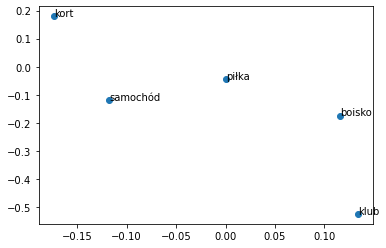

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

with torch.no_grad():
    words = ['piłka', 'klub', 'kort', 'boisko', 'samochód']
    words_ixs = [torch.argmax(vectorize_text(w).float().unsqueeze(dim=0)).item() for w in words]

    x_label = labels_dic['pilka-nozna']
    y_label = labels_dic['tenis']

    x = [model[0].weight[x_label, ix] for ix in words_ixs]
    y = [model[0].weight[y_label, ix] for ix in words_ixs]

    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(words):
        ax.annotate(txt, (x[i], y[i]))

### Zadanie etykietowania sekwencji



Zadanie etykietowania sekwencji (*sequence labelling*) polega na przypisaniu poszczególnym wyrazom (tokenom) tekstu **etykiet** ze skończonego zbioru. Definiując formalnie:

-   rozpatrujemy ciąg wejściowy tokenów $(t^1,\dots,t^K)$
-   dany jest skończony zbiór etykiet $L = \{l_1,\dots,l_{|L|}\}$, dla uproszczenia można założyć, że etykietami
    są po prostu kolejne liczby, tj. $L=\{0,\dots,|L|-1\}$
-   zadanie polega na wygenerowaniu sekwencji etykiet (o tej samej długości co ciąg wejściowy!) $(y^1,\dots,y^K)$,
    $y^k \in L$

Zadanie etykietowania można traktować jako przypadek szczególny klasyfikacji wieloklasowej, z tym, że klasyfikacji dokonujemy wielokrotnie — dla każdego tokenu (nie dla każdego tekstu).

Przykłady zastosowań:

-   oznaczanie częściami mowy (*POS tagger*) — czasownik, przymiotnik, rzeczownik itd.
-   oznaczanie etykiet nazw w zadaniu NER (nazwisko, kwoty, adresy — najwięcej tokenów będzie miało etykietę pustą, zazwyczaj oznaczaną przez `O`)



#### **Pytanie**: czy zadanie tłumaczenia maszynowego można potraktować jako problem etykietowania sekwencji?



#### Przykładowe wyzwanie NER CoNLL-2003



Zob. [https://gonito.net/challenge/en-ner-conll-2003](https://gonito.net/challenge/en-ner-conll-2003).

Przykładowy przykład uczący (`xzcat train.tsv.xz| head -n 1`):

O O B-MISC I-MISC O O O O O B-LOC O B-LOC O O O O O O O O O O O B-MISC I-MISC O O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER I-PER O B-LOC O O O O O B-PER I-PER O O B-LOC O O O O O O B-PER I-PER O B-LOC O O O O O B-PER I-PER O O O O O B-PER I-PER O B-LOC O O O O O B-PER I-PER O B-LOC O B-LOC O O O O O O B-PER I-PER O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O B-LOC O O O O O B-PER I-PER O O O O O B-PER I-PER O B-LOC O O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O O O O O B-PER I-PER O B-LOC O O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O O O O B-PER I-PER I-PER O B-LOC O O O O O O B-PER I-PER O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O O O O B-PER I-PER O B-LOC O O O O O O B-PER I-PER O B-LOC O O O O O B-PER I-PER O B-LOC O B-LOC O O O O O B-PER I-PER O O O O O	GOLF - BRITISH MASTERS THIRD ROUND SCORES . </S> NORTHAMPTON , England 1996-08-30 </S> Leading scores after </S> the third round of the British Masters on Friday : </S> 211 Robert Allenby ( Australia ) 69 71 71 </S> 212 Pedro Linhart ( Spain ) 72 73 67 </S> 216 Miguel Angel Martin ( Spain ) 75 70 71 , Costantino Rocca </S> ( Italy ) 71 73 72 </S> 217 Antoine Lebouc ( France ) 74 73 70 , Ian Woosnam 70 76 71 , </S> Francisco Cea ( Spain ) 70 71 76 , Gavin Levenson ( South </S> Africa ) 66 75 76 </S> 218 Stephen McAllister 73 76 69 , Joakim Haeggman ( Swe ) 71 77 </S> 70 , Jose Coceres ( Argentina ) 69 78 71 , Paul Eales 75 71 72 , </S> Klas Eriksson ( Sweden ) 71 75 72 , Mike Clayton ( Australia ) </S> 69 76 73 , Mark Roe 69 71 78 </S> 219 Eamonn Darcy ( Ireland ) 74 76 69 , Bob May ( U.S. ) 74 75 70 , </S> Paul Lawrie 72 75 72 , Miguel Angel Jimenez ( Spain ) 74 72 </S> 73 , Peter Mitchell 74 71 75 , Philip Walton ( Ireland ) 71 74 </S> 74 , Peter O'Malley ( Australia ) 71 73 75 </S> 220 Barry Lane 73 77 70 , Wayne Riley ( Australia ) 71 78 71 , </S> Martin Gates 71 77 72 , Bradley Hughes ( Australia ) 73 75 72 , </S> Peter Hedblom ( Sweden ) 70 75 75 , Retief Goosen ( South </S> Africa ) 71 74 75 , David Gilford 69 74 77 . </S>

W pierwszym polu oczekiwany wynik zapisany za pomocą notacji **BIO**.

Jako metrykę używamy F1 (z pominięciem tagu `O`)



#### Metryka F1



#### Etykietowanie za pomocą klasyfikacji wieloklasowej



Można potraktować problem etykietowania dokładnie tak jak problem
klasyfikacji wieloklasowej (jak w przykładzie klasyfikacji dyscyplin
sportowych powyżej), tzn. rozkład prawdopodobieństwa możliwych etykiet
uzyskujemy poprzez zastosowanie prostej warstwy liniowej i funkcji softmax:

$$p(l^k=i) = s(\vec{w}\vec{v}(t^k))_i = \frac{e^{\vec{w}\vec{v}(t^k)}}{Z},$$

gdzie $\vec{v}(t^k)$ to reprezentacja wektorowa tokenu $t^k$.
Zauważmy, że tutaj (w przeciwieństwie do klasyfikacji całego tekstu)
reprezentacja wektorowa jest bardzo uboga: wektor <u>one-hot</u>! Taki
klasyfikator w ogóle nie będzie brał pod uwagę kontekstu, tylko sam
wyraz, więc tak naprawdę zdegeneruje się to do zapamiętania częstości
etykiet dla każdego słowa osobno.



##### Bogatsza reprezentacja słowa



Można spróbować uzyskać bogatszą reprezentację dla słowa biorąc pod uwagę na przykład:

-   długość słowa
-   kształt słowa (*word shape*), np. czy pisany wielkimi literami, czy składa się z cyfr itp.
-   n-gramy znakowe wewnątrz słowa (np. słowo *Kowalski* można zakodować jako sumę wektorów
    trigramów znakówych $\vec{v}(Kow) + \vec{v}(owa) + \vec{v}(wal) + \vec{v}(als) + \vec{v}(lsk) + + \vec{v}(ski)$

Cały czas nie rozpatrujemy jednak w tej metodzie kontekstu wyrazu.
(*Renault* w pewnym kontekście może być nazwą firmy, w innym —
nazwiskiem).



##### Reprezentacja kontekstu



Za pomocą wektora można przedstawić nie pojedynczy token $t^k$, lecz
cały kontekst, dla *okna* o długości $c$ będzie to kontekst $t^{k-c},\dots,t^k,\dots,t^{k+c}$.
Innymi słowy klasyfikujemy token na podstawie jego samego oraz jego kontekstu:

$$p(l^k=i) = \frac{e^{\vec{w}\vec{v}(t^{k-c},\dots,t^k,\dots,t^{k+c})}}{Z_k}.$$

Zauważmy, że w tej metodzie w ogóle nie rozpatrujemy sensowności
sekwencji wyjściowej (etykiet), np. może być bardzo mało
prawdopodobne, że bezpośrednio po nazwisku występuje data.

Napiszmy wzór określający prawdopodobieństwo całej sekwencji, nie
tylko pojedynczego tokenu. Na razie będzie to po prostu iloczyn poszczególnych wartości.

$$p(l) = \prod_{k=1}^K \frac{e^{\vec{w}\vec{v}(t^{k-c},\dots,t^k,\dots,t^{k+c})}}{Z_k} = \frac{e^{\sum_{k=1}^K\vec{w}\vec{v}(t^{k-c},\dots,t^k,\dots,t^{k+c})}}{\prod_{k=1}^K Z_k}$$



### Warunkowe pola losowe



Warunkowe pola losowe (*Conditional Random Fields*, *CRF*) to klasa
modeli, które pozwalają uwzględnić zależności między punktami danych
(które można wyrazić jako graf). Najprostszym przykładem będzie prosty
graf wyrażający „następowanie po” (czyli sekwencje). Do poprzedniego
wzoru dodamy składnik $V_{i,j}$ (który można interpretować jako
macierz) określający prawdopodobieństwo, że po etykiecie o numerze $i$ wystąpi etykieta o numerze $j$.



#### **Pytanie**: Czy macierz $V$ musi być symetryczna? Czy $V_{i,j} = V_{j,i}$? Czy jakieś specjalne wartości występują na przekątnej?



Macierz $V$ wraz z wektorem $\vec{w}$ będzie stanowiła wyuczalne wagi w naszym modelu.

Wartości $V_{i,j}$ nie stanowią bezpośrednio prawdopodobieństwa, mogą
przyjmować dowolne wartości, które będę normalizowane podobnie jak to się dzieje w funkcji Softmax.

W takiej wersji warunkowych pól losowych otrzymamy następujący wzór na prawdopodobieństwo całej sekwencji.

$$p(l) = \frac{e^{\sum_{k=1}^K\vec{w}\vec{v}(t^{k-c},\dots,t^k,\dots,t^{k+c}) + \sum_{k=1}^{K-1} V_{l_k,l_{k+1}}}}{\prod_{k=1}^K Z_k}$$

